In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h3

In [2]:
url_listings_2024  = f'/Users/tsernian/Documents/CASA/CASA0013_FSDS/CASA0013_FSDS_Airbnb_living la vida code-a/Documentation/data/listings.csv.gz'
url_listings_2021 = f'/Users/tsernian/Documents/CASA/CASA0013_FSDS/CASA0013_FSDS_Airbnb_living la vida code-a/Documentation/data/2021_listings.csv.gz'
url_listings_2022 = f'/Users/tsernian/Documents/CASA/CASA0013_FSDS/CASA0013_FSDS_Airbnb_living la vida code-a/Documentation/data/2022_listings.csv.gz'
url_listings_2023 = f'/Users/tsernian/Documents/CASA/CASA0013_FSDS/CASA0013_FSDS_Airbnb_living la vida code-a/Documentation/data/2023_listings.csv.gz'

In [3]:
df_listings_2024 = pd.read_csv(url_listings_2024, compression='gzip', low_memory=False) #compression='gzip' is to unzip the file
df_listings_2021 = pd.read_csv(url_listings_2021, compression='gzip', low_memory=False)
df_listings_2022 = pd.read_csv(url_listings_2022, compression='gzip', low_memory=False)
df_listings_2023 = pd.read_csv(url_listings_2023, compression='gzip', low_memory=False)

print(f"Data frame listings_2024 is {df_listings_2024.shape[0]:,} x {df_listings_2024.shape[1]}")
print(f"Data frame listings_2021 is {df_listings_2021.shape[0]:,} x {df_listings_2021.shape[1]}")
print(f"Data frame listings_2022 is {df_listings_2022.shape[0]:,} x {df_listings_2022.shape[1]}")
print(f"Data frame listings_2023 is {df_listings_2023.shape[0]:,} x {df_listings_2023.shape[1]}")

Data frame listings_2024 is 96,182 x 75
Data frame listings_2021 is 70,617 x 74
Data frame listings_2022 is 69,351 x 75
Data frame listings_2023 is 87,946 x 75


In [4]:
df_listings_2024.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96182 entries, 0 to 96181
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            96182 non-null  int64  
 1   listing_url                                   96182 non-null  object 
 2   scrape_id                                     96182 non-null  int64  
 3   last_scraped                                  96182 non-null  object 
 4   source                                        96182 non-null  object 
 5   name                                          96182 non-null  object 
 6   description                                   92763 non-null  object 
 7   neighborhood_overview                         45661 non-null  object 
 8   picture_url                                   96171 non-null  object 
 9   host_id                                       96182 non-null 

In [5]:
columns_2024 = set(df_listings_2024.columns)
columns_2021 = set(df_listings_2021.columns)
columns_2022 = set(df_listings_2022.columns)
columns_2023 = set(df_listings_2023.columns)


diff_2024_2021 = columns_2024.symmetric_difference(columns_2021)
diff_2024_2022 = columns_2024.symmetric_difference(columns_2022)
diff_2024_2023 = columns_2024.symmetric_difference(columns_2023)

print("Columns different between 2024 and 2021:", diff_2024_2021)
print("Columns different between 2024 and 2022:", diff_2024_2022)
print("Columns different between 2024 and 2023:", diff_2024_2023)

Columns different between 2024 and 2021: {'source'}
Columns different between 2024 and 2022: set()
Columns different between 2024 and 2023: set()


In [6]:
#add a new column called year to each dataframe
df_listings_2024['year'] = 2024
df_listings_2021['year'] = 2021
df_listings_2022['year'] = 2022
df_listings_2023['year'] = 2023

df_listings_combined = pd.concat([df_listings_2024, df_listings_2021, df_listings_2022, df_listings_2023], axis=0, ignore_index=True)   
print(f"Combined data frame is {df_listings_combined.shape[0]:,} x {df_listings_combined.shape[1]}")

#select the column I want to use
columns_to_use = ['id', 'listing_url', 'name', 'host_id', 'host_name', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'property_type', 'room_type', 'price', 'number_of_reviews','review_scores_rating', 'year']
df_listings_combined = df_listings_combined[columns_to_use]
print(f"Combined data frame is {df_listings_combined.shape[0]:,} x {df_listings_combined.shape[1]}")

Combined data frame is 324,096 x 76
Combined data frame is 324,096 x 15


In [7]:
df_listings_combined

,id,listing_url,name,host_id,host_name,host_listings_count,host_total_listings_count,latitude,longitude,property_type,room_type,price,number_of_reviews,review_scores_rating,year
0,13913,https://www.airbnb.com/rooms/13913,Holiday London DB Room Let-on going,54730,Alina,3.0,4.0,51.568610,-0.112700,Private room in rental unit,Private room,$59.00,44,4.82,2024
1,15400,https://www.airbnb.com/rooms/15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,1.0,1.0,51.487800,-0.168130,Entire rental unit,Entire home/apt,$120.00,96,4.80,2024
2,17402,https://www.airbnb.com/rooms/17402,Fab 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,7.0,32.0,51.521950,-0.140940,Entire rental unit,Entire home/apt,$493.00,56,4.77,2024
3,24328,https://www.airbnb.com/rooms/24328,"Battersea live/work artist house, garden & par...",41759,Joe,1.0,3.0,51.470720,-0.162660,Entire townhouse,Entire home/apt,$190.00,94,4.90,2024
4,33332,https://www.airbnb.com/rooms/33332,Beautiful Ensuite Richmond-upon-Thames borough,144444,Chi-Chi,2.0,2.0,51.464100,-0.324980,Private room in home,Private room,$140.00,19,4.37,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324091,973781286754517228,https://www.airbnb.com/rooms/973781286754517228,Rental unit in Greater London · ★New · 1 bedro...,498408783,Sal,2.0,2.0,51.514860,-0.135980,Entire rental unit,Entire home/apt,$275.00,0,NaN,2023
324092,973801695874775338,https://www.airbnb.com/rooms/973801695874775338,Rental unit in Greater London · ★New · 1 bedro...,36645347,Josie,1.0,1.0,51.459042,-0.055458,Entire rental unit,Entire home/apt,$145.00,0,NaN,2023
324093,973811685656289740,https://www.airbnb.com/rooms/973811685656289740,Home in Greater London · ★New · 1 bedroom · 5 ...,340514057,Mal,1.0,1.0,51.406100,-0.236126,Private room in home,Private room,$160.00,0,NaN,2023
324094,973882998775927897,https://www.airbnb.com/rooms/973882998775927897,Home in Greater London · ★New · 5 bedrooms · 5...,439074505,Travelnest,2538.0,5217.0,51.450997,-0.444319,Entire home,Entire home/apt,$680.00,0,NaN,2023


In [8]:
#how many unigue id and host id
print(f"Number of unique id is {df_listings_combined['id'].nunique():,}")
print(f"Number of unique host id is {df_listings_combined['host_id'].nunique():,}")


Number of unique id is 161,361
Number of unique host id is 85,219


In [9]:
#select by host id annd year range
host_id = 54730
start_year = 2023
end_year = 2024

def select_function(df, host_id, start_year, end_year):
    return df[(df['host_id'] == host_id) & (df['year'] >= start_year) & (df['year'] <= end_year)]

df_listings_combined_by_host_id_and_year_range = select_function(df_listings_combined, host_id, start_year, end_year)
df_listings_combined_by_host_id_and_year_range

,id,listing_url,name,host_id,host_name,host_listings_count,host_total_listings_count,latitude,longitude,property_type,room_type,price,number_of_reviews,review_scores_rating,year
0,13913,https://www.airbnb.com/rooms/13913,Holiday London DB Room Let-on going,54730,Alina,3.0,4.0,51.568610,-0.112700,Private room in rental unit,Private room,$59.00,44,4.82,2024
117,89870,https://www.airbnb.com/rooms/89870,London Holiday Flat Let-Islington,54730,Alina,3.0,4.0,51.567920,-0.111250,Entire rental unit,Entire home/apt,$143.00,142,4.63,2024
70989,1021187456703584211,https://www.airbnb.com/rooms/1021187456703584211,Lovely Art Flat in Finsbury Park,54730,Alina,3.0,4.0,51.570208,-0.113028,Entire rental unit,Entire home/apt,$143.00,1,5.00,2024
236152,13913,https://www.airbnb.com/rooms/13913,Rental unit in Islington · ★4.80 · 1 bedroom ·...,54730,Alina,3.0,4.0,51.568610,-0.112700,Private room in rental unit,Private room,$79.00,41,4.80,2023
236273,89870,https://www.airbnb.com/rooms/89870,Rental unit in London · ★4.63 · 1 bedroom · 1 ...,54730,Alina,3.0,4.0,51.567920,-0.111250,Entire rental unit,Entire home/apt,$149.00,129,4.63,2023


### I don't know why host_listings_count and host_total_listings_count are different and It should count in 2 in 2023 so I will drop them and count it again

In [10]:
df_host_listings_count = df_listings_combined.groupby(['host_id', 'year'])['id'].nunique().reset_index()
df_host_listings_count.columns = ['host_id', 'year', 'host_listings_count']
df_host_listings_count

filtered_df = df_host_listings_count[df_host_listings_count['host_id'] == 54730]
print(filtered_df)

     host_id  year  host_listings_count
146    54730  2021                    2
147    54730  2022                    2
148    54730  2023                    2
149    54730  2024                    3


In [11]:
df_host_listings_count_fliter = df_host_listings_count [df_host_listings_count['year'] <= 2024]    
statistics_summary = df_host_listings_count_fliter['host_listings_count'].describe()
print(statistics_summary)

count    202381.000000
mean          1.601415
std           5.311590
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         864.000000
Name: host_listings_count, dtype: float64


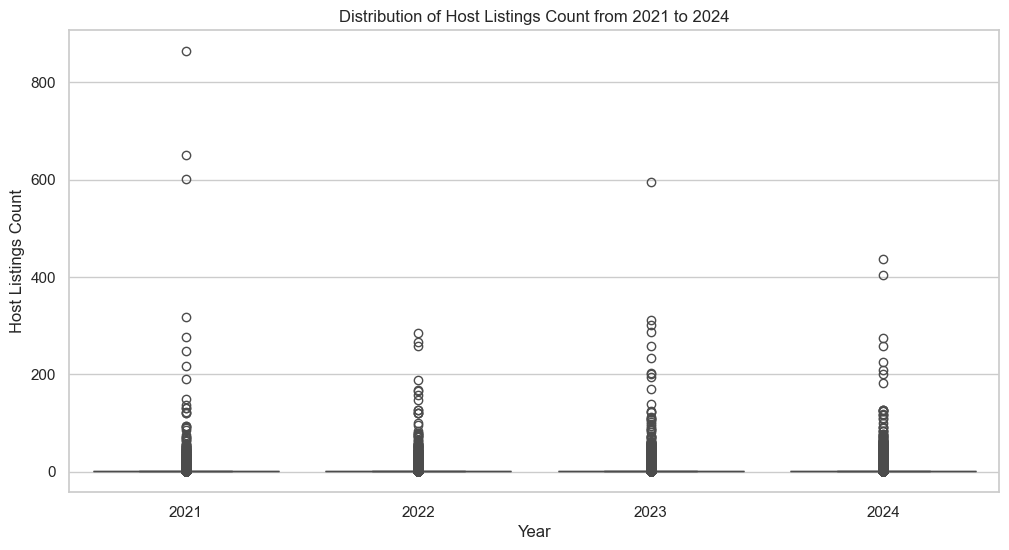

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='host_listings_count', data=df_host_listings_count)

plt.title('Distribution of Host Listings Count from 2021 to 2024')
plt.xlabel('Year')
plt.ylabel('Host Listings Count')

plt.show()

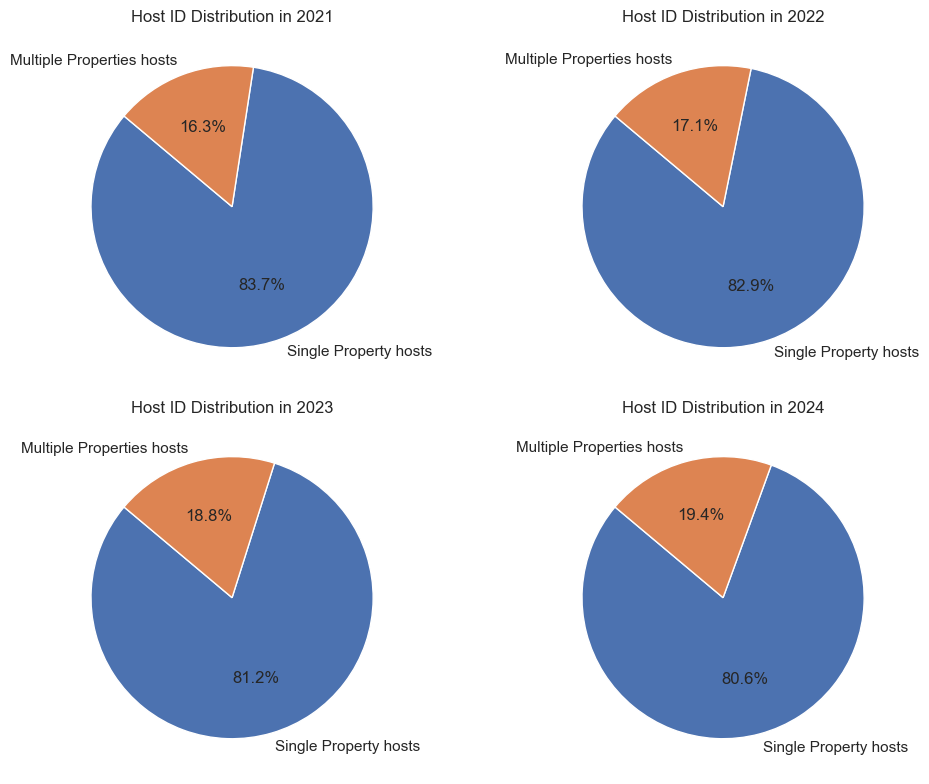

In [25]:
bins = [0, 2, float('inf')] #catogrize host_listings_count into <=1 and >2
labels = ['Single Property hosts', 'Multiple Properties hosts']
df_host_listings_count['category'] = pd.cut(df_host_listings_count['host_listings_count'], bins=bins, labels=labels, right=False)

sns.set(style="whitegrid") #like darkgrid, whitegrid, dark, white, ticks
plt.figure(figsize=(10, 8))


for i, year in enumerate(range(2021, 2025), 1): # i is the index of the year
    plt.subplot(2, 2, i) 
    yearly_data = df_host_listings_count[df_host_listings_count['year'] == year]
    category_counts = yearly_data['category'].value_counts().sort_index()
    plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)  #startangle=140 is to rotate the pie chart #autopct is to show the percentage
    plt.title(f'Host ID Distribution in {year}')


plt.tight_layout()
plt.show()

In [22]:
df_host_listings_count

,host_id,year,host_listings_count,category
0,2010,2021,1,Single Property
1,2594,2024,1,Single Property
2,4775,2021,7,Multiple Properties
3,4775,2022,7,Multiple Properties
4,4775,2023,6,Multiple Properties
...,...,...,...,...
202376,650145538,2024,1,Single Property
202377,650159011,2024,1,Single Property
202378,650171076,2024,1,Single Property
202379,650251399,2024,2,Multiple Properties


In [14]:
df_new_listings_combined = df_listings_combined.merge(df_host_listings_count, on=['host_id', 'year'], how='left') 
df_new_listings_combined = df_new_listings_combined.rename(columns={'host_listings_count_y': 'new_host_listings_count'})
df_new_listings_combined

#df_new_listings_combined.to_csv('df_new_listings_combined.csv', index=False) 

,id,listing_url,name,host_id,host_name,host_listings_count_x,host_total_listings_count,latitude,longitude,property_type,room_type,price,number_of_reviews,review_scores_rating,year,new_host_listings_count,category
0,13913,https://www.airbnb.com/rooms/13913,Holiday London DB Room Let-on going,54730,Alina,3.0,4.0,51.568610,-0.112700,Private room in rental unit,Private room,$59.00,44,4.82,2024,3,Multiple Properties
1,15400,https://www.airbnb.com/rooms/15400,Bright Chelsea Apartment. Chelsea!,60302,Philippa,1.0,1.0,51.487800,-0.168130,Entire rental unit,Entire home/apt,$120.00,96,4.80,2024,1,Single Property
2,17402,https://www.airbnb.com/rooms/17402,Fab 3-Bed/2 Bath & Wifi: Trendy W1,67564,Liz,7.0,32.0,51.521950,-0.140940,Entire rental unit,Entire home/apt,$493.00,56,4.77,2024,6,Multiple Properties
3,24328,https://www.airbnb.com/rooms/24328,"Battersea live/work artist house, garden & par...",41759,Joe,1.0,3.0,51.470720,-0.162660,Entire townhouse,Entire home/apt,$190.00,94,4.90,2024,1,Single Property
4,33332,https://www.airbnb.com/rooms/33332,Beautiful Ensuite Richmond-upon-Thames borough,144444,Chi-Chi,2.0,2.0,51.464100,-0.324980,Private room in home,Private room,$140.00,19,4.37,2024,2,Multiple Properties
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324091,973781286754517228,https://www.airbnb.com/rooms/973781286754517228,Rental unit in Greater London · ★New · 1 bedro...,498408783,Sal,2.0,2.0,51.514860,-0.135980,Entire rental unit,Entire home/apt,$275.00,0,NaN,2023,2,Multiple Properties
324092,973801695874775338,https://www.airbnb.com/rooms/973801695874775338,Rental unit in Greater London · ★New · 1 bedro...,36645347,Josie,1.0,1.0,51.459042,-0.055458,Entire rental unit,Entire home/apt,$145.00,0,NaN,2023,1,Single Property
324093,973811685656289740,https://www.airbnb.com/rooms/973811685656289740,Home in Greater London · ★New · 1 bedroom · 5 ...,340514057,Mal,1.0,1.0,51.406100,-0.236126,Private room in home,Private room,$160.00,0,NaN,2023,1,Single Property
324094,973882998775927897,https://www.airbnb.com/rooms/973882998775927897,Home in Greater London · ★New · 5 bedrooms · 5...,439074505,Travelnest,2538.0,5217.0,51.450997,-0.444319,Entire home,Entire home/apt,$680.00,0,NaN,2023,170,Multiple Properties


In [28]:


 #1. follow the column 'property_type' to data label
 #2. year is 2024
 #3. value is count id
 #4. draw two pei chart according to category



In [26]:
#pip install pygwalker
#import pygwalker as pyg
#df = df_new_listings_combined
#df.head()
#pyg.walk(df, dark='light')
#this is to visualization tool for the dataframe

